In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
import seaborn as sns
import scipy

In [2]:
filepath = "F:/Two-Photon/Psilocybin Project/Evoked Cohort Mice/compiled_dicts"
z_thresh = 4

LOAD RANDOMIZED STIM COHORT DICTS:

In [3]:
# Dictionary to map filenames to variable names
file_variable_mapping = {
    'saline_pre_dict.pkl': 'saline_pre',
    'saline_post_dict.pkl': 'saline_post',
    'psilo_pre_dict.pkl': 'psilo_pre',
    'psilo_post_dict.pkl': 'psilo_post'
}

# Initialize empty dictionaries
saline_pre = {}
saline_post = {}
psilo_pre = {}
psilo_post = {}

# Iterate through files in megadict folder
for filename in os.listdir(filepath):
    if filename in file_variable_mapping:
        file_path = os.path.join(filepath, filename)
        with open(file_path, 'rb') as file:
            # Load pkl file and assign to respective dictionary variable
            globals()[file_variable_mapping[filename]] = pickle.load(file)

MATCHED CELLS FUNCTIONS:

In [4]:
def get_activity_info(dict_1,dict_2,PRE,POST):

    matched_responsive_1 = []
    matched_non_responsive_1 = []
    matched_responsive_2 = []
    matched_non_responsive_2 = []

    matched_cells = dict_1[PRE][next(iter(dict_1[PRE]))]['matched_cells']
    matched_cells_2 = dict_2[POST][next(iter(dict_2[POST]))]['matched_cells']

    if len(matched_cells) != len(matched_cells_2):
        print("You have two different matched cells arrays here!")

    for cell in dict_1[PRE]:
            if cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == True:
                matched_responsive_1.append(cell)
            elif cell in matched_cells[:,0] and dict_1[PRE][cell]['active'] == False:
                  matched_non_responsive_1.append(cell)

    for cell in dict_2[POST]:
            if cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == True:
                matched_responsive_2.append(cell)
            elif cell in matched_cells[:,1] and dict_2[POST][cell]['active'] == False:
                  matched_non_responsive_2.append(cell)
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_first_only = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    # Filter coactive cells where the first column is true and the second column is false
    responsive_second_only = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    responsive_both = matched_cells[(np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (np.isin(matched_cells[:, 1], matched_responsive_2))]
    
    non_responsive = matched_cells[(~np.isin(matched_cells[:, 0], matched_responsive_1)) & 
                                         (~np.isin(matched_cells[:, 1], matched_responsive_2))]

    total_matched_cells = len(matched_cells)
    

    total_responsive_both = len(responsive_both)
    total_responsive_first_only = len(responsive_first_only)
    total_responsive_second_only = len(responsive_second_only)
    total_non_responsive = len(non_responsive)

    if total_matched_cells == total_responsive_both + total_responsive_first_only + total_responsive_second_only + total_non_responsive:
        print("The lengths add up correctly.")
    else:
        print("The lengths do not add up correctly.")


    return responsive_both, responsive_first_only, responsive_second_only, non_responsive,matched_responsive_1,matched_responsive_2

In [5]:
def get_activity_profiles(dict_pre,dict_post):

    responsive_both_all = []
    responsive_first_only_all = []
    responsive_second_only_all = []
    non_responsive_all = []
    matched_active_1_all = []
    matched_active_2_all = []

    for sub_dict_pre, sub_dict_post in zip(dict_pre.keys(),dict_post.keys()):

        # Call the function once
        result = get_activity_info(dict_pre, dict_post, sub_dict_pre, sub_dict_post)

        # Extract the outputs
        responsive_both, responsive_first_only, responsive_second_only, non_responsive, matched_active_1, matched_active_2 = result

        # Append to respective arrays
        responsive_both_all.append(responsive_both)
        responsive_first_only_all.append(responsive_first_only)
        responsive_second_only_all.append(responsive_second_only)
        non_responsive_all.append(non_responsive)
        matched_active_1_all.append(matched_active_1)
        matched_active_2_all.append(matched_active_2)
    
    responsive_both_all = np.concatenate(responsive_both_all)
    responsive_first_only_all = np.concatenate(responsive_first_only_all)
    responsive_second_only_all = np.concatenate(responsive_second_only_all)
    non_responsive_all = np.concatenate(non_responsive_all)
    matched_active_1_all = np.concatenate(matched_active_1_all)
    matched_active_2_all = np.concatenate(matched_active_2_all)
    total_cells = sum(len(arr) for arr in [responsive_both_all, responsive_first_only_all, responsive_second_only_all, non_responsive_all])

    return responsive_both_all,responsive_first_only_all,responsive_second_only_all,non_responsive_all,matched_active_1_all,matched_active_2_all,total_cells

In [6]:
def get_activity_percentages(pre,post):
    
    result = get_activity_profiles(pre,post)

    responsive_both,responsive_first_only,responsive_second_only,non_responsive,matched_active_1,matched_active_2,total_cells = result

    perc_responsive_both = len(responsive_both)/total_cells * 100

 

    perc_responsive_first_only = len(responsive_first_only)/total_cells * 100

   

    perc_responsive_second_only = len(responsive_second_only)/total_cells * 100


    perc_non_responsive = len(non_responsive)/total_cells * 100

    return perc_responsive_both,perc_responsive_first_only,perc_responsive_second_only,perc_non_responsive
    

In [7]:
percs_saline = get_activity_percentages(saline_pre,saline_post)
print(percs_saline)

The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
(22.128851540616246, 13.445378151260504, 14.285714285714285, 50.14005602240896)


The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.
The lengths add up correctly.


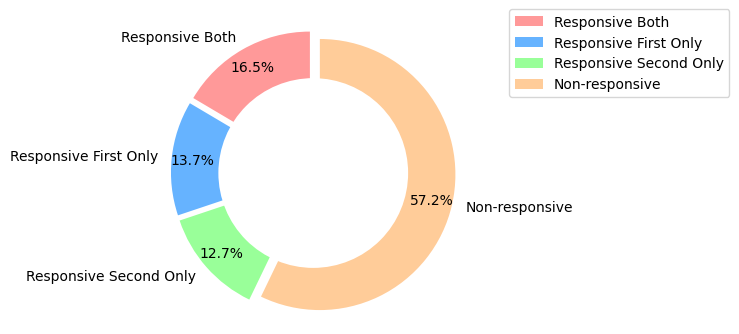

In [8]:
result = get_activity_percentages(psilo_pre,psilo_post)
perc_responsive_both,perc_responsive_first_only, perc_responsive_second_only, perc_non_responsive = result


# Pie chart
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [perc_responsive_both,perc_responsive_first_only, perc_responsive_second_only, perc_non_responsive]
errors = []
# Colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
# Adjust aspect ratio to make the sections of the donut plot equal
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

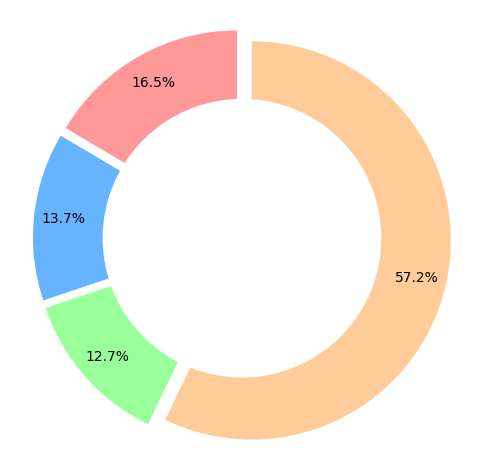

In [9]:
# Data
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [perc_responsive_both, perc_responsive_first_only, perc_responsive_second_only, perc_non_responsive]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0.05, 0.05, 0.05)

# Create the pie chart

plt.pie(sizes, colors=colors, labels=['']*len(labels), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.gca().set_aspect('equal', adjustable='box')

# Add legend
# plt.legend(labels, loc="right")

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
coactive_saline = [17.05069124,24.48979592,16.38418079,26.76767677,8.108108108,33.96226415,27.43362832,31.37254902]
coactive_saline_mean = np.mean(coactive_saline)
print(coactive_saline_mean)
coactive_psilo = [15.96091205,9.195402299,13.24786325,30.12048193,3.76344086,21.7721519,23.01587302,26.4957265]

df_percent_coactive = pd.DataFrame(columns=['Saline','Psilocybin'])

df_percent_coactive['Saline'] = coactive_saline
df_percent_coactive['Psilocybin'] = coactive_psilo

23.19611178975


Text(0.5, 37.5, 'n.s')

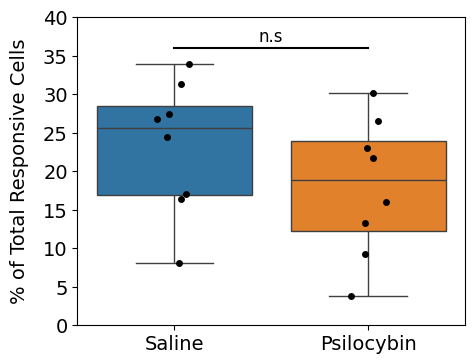

In [11]:
# Plotting the boxplot
plt.figure(figsize=(5,4))
ax = sns.boxplot(data=df_percent_coactive)
sns.stripplot(data=df_percent_coactive, color='black')


# Adding labels and title to the boxplot
plt.ylabel("% of Total Responsive Cells",fontsize=14,labelpad=10)
plt.title("", pad=10)
plt.ylim(0,40)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Drawing a line with "n.s" text
plt.axhline(xmin=0.25,xmax=0.75, y=36, color='black', linestyle='-')
plt.text(0.5, 37.5, 'n.s', horizontalalignment='center', verticalalignment='center',fontsize=12)

In [12]:
only_first_saline = [12.44239631,12.24489796,14.12429379,17.17171717,11.71171171,9.433962264,7.96460177,16.33986928]
only_first_psilo = [9.120521173,12.64367816,14.1025641,19.27710843,9.139784946,15.69620253,16.26984127,12.82051282]

only_second_saline = [15.66820276,16.32653061,12.42937853,16.16161616,5.405405405,24.52830189,14.15929204,14.37908497]
only_second_psilo = [10.09771987,5.747126437,9.829059829,13.85542169,15.59139785,13.92405063,16.26984127,16.23931624]

non_responsive_saline = [54.83870968,46.93877551,57.06214689,39.8989899,74.77477477,32.0754717,50.44247788,37.90849673]
non_responsive_psilo = [64.82084691,72.4137931,62.82051282,36.74698795,71.50537634,48.60759494,44.44444444,44.44444444]

df_percent_first = pd.DataFrame(columns=['Saline','Psilocybin'])

df_percent_first['Saline'] = only_first_saline
df_percent_first['Psilocybin'] = only_first_psilo

df_percent_second = pd.DataFrame(columns=['Saline','Psilocybin'])

df_percent_second['Saline'] = only_second_saline
df_percent_second['Psilocybin'] = only_second_psilo

df_percent_non_responsive = pd.DataFrame(columns=['Saline','Psilocybin'])

df_percent_non_responsive['Saline'] = non_responsive_saline
df_percent_non_responsive['Psilocybin'] = non_responsive_psilo

In [16]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(only_second_saline, only_second_psilo)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Statistic: {statistic}")

Mann-Whitney U statistic: 41.0
P-value: 0.3822843822843822
Statistic: 41.0


Text(0.5, 82, 'n.s')

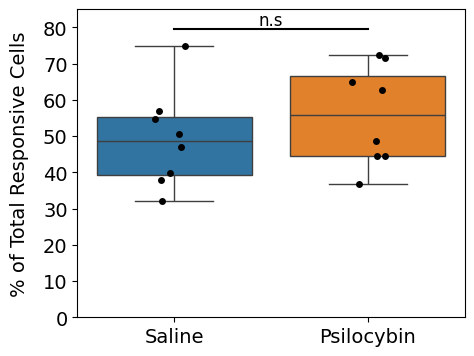

In [13]:
# Plotting the boxplot
plt.figure(figsize=(5,4))
ax = sns.boxplot(data=df_percent_non_responsive,showfliers=False)
sns.stripplot(data=df_percent_non_responsive, color='black')


# Adding labels and title to the boxplot
plt.ylabel("% of Total Responsive Cells",fontsize=14,labelpad=10)
plt.title("", pad=10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,85)
# Drawing a line with "n.s" text
plt.axhline(xmin=0.25,xmax=0.75, y=79.5, color='black', linestyle='-')
plt.text(0.5, 82, 'n.s', horizontalalignment='center', verticalalignment='center',fontsize=12)

In [14]:
# sem_coactive_saline = scipy.stats.sem(coactive_saline)
# print(sem_coactive_saline)
# sem_only_first_saline = scipy.stats.sem(only_first_saline)
# print(sem_only_first_saline)

# sem_only_second_saline = scipy.stats.sem(only_second_saline)
# print(sem_only_second_saline)

# sem_non_responsive_saline = scipy.stats.sem(non_responsive_saline)
# print(sem_non_responsive_saline)

sem_coactive_psilo = scipy.stats.sem(coactive_psilo)
print(sem_coactive_psilo)

sem_only_first_psilo = scipy.stats.sem(only_first_psilo)
print(sem_only_first_psilo)

sem_only_second_psilo = scipy.stats.sem(only_second_psilo)
print(sem_only_second_psilo)

sem_non_responsive_psilo = scipy.stats.sem(non_responsive_psilo)
print(sem_non_responsive_psilo)

3.1774593664093547
1.2354620445485365
1.3351053446604377
4.8659551393130425


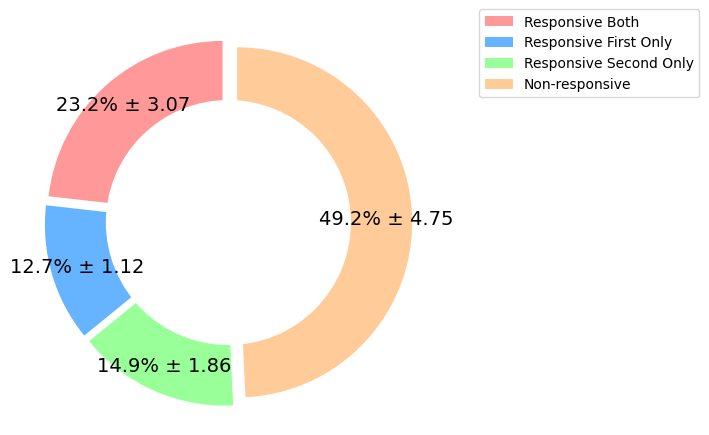

In [15]:
# SALINE PIE CHART
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [23.20, 12.68, 14.88, 49.24]
errors = [3.07, 1.12, 1.86, 4.75]

# Colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

# Create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, labels=['']*len(labels), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Customize the labels to include SEM
for i, autotext in enumerate(autotexts):
    percentage = sizes[i]
    error = errors[i]
    autotext.set_text(f'{percentage:.1f}% ± {error:.2f}')
    autotext.set(fontsize=14)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust aspect ratio to make the sections of the donut plot equal
plt.gca().set_aspect('equal', adjustable='box')

# Add legend
plt.legend(labels,bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


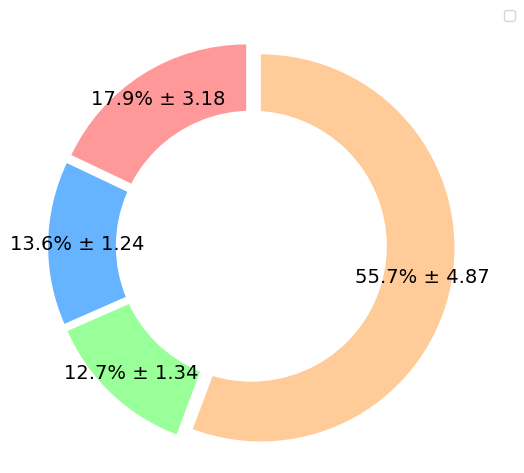

In [16]:
# PSILOCYBIN PIE CHART
labels = ['Responsive Both', 'Responsive First Only', 'Responsive Second Only', 'Non-responsive']
sizes = [17.95,13.63,12.69,55.72]
errors = [3.18, 1.24, 1.34, 4.87]

# Colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
# Explosion
explode = (0.05, 0.05, 0.05, 0.05)

# Create pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, colors=colors, labels=['']*len(labels), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)

# Customize the labels to include SEM
for i, autotext in enumerate(autotexts):
    percentage = sizes[i]
    error = errors[i]
    autotext.set_text(f'{percentage:.1f}% ± {error:.2f}')
    autotext.set(fontsize=14)

# Draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adjust aspect ratio to make the sections of the donut plot equal
plt.gca().set_aspect('equal', adjustable='box')

#Add legend
plt.legend(bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()
plt.show()

AMPLITUDE AND MEAN RESPONSE:

In [17]:
cell_list = list(saline_pre[next(iter(saline_pre))].keys())
print(cell_list)
nfreq = list(saline_pre[next(iter(saline_pre))][cell_list[0]]['deconvolved_traces'].keys())
nInt = list(saline_pre[next(iter(saline_pre))][cell_list[0]]['deconvolved_traces'][nfreq[0]].keys())
ntrial = list(saline_pre[next(iter(saline_pre))][cell_list[0]]['deconvolved_traces'][nfreq[0]][nInt[0]].keys())
print(nfreq, nInt, ntrial)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 201, 203, 204, 206, 207, 208, 209, 211, 213, 214, 215, 217, 218, 219, 221, 222, 225, 226, 227, 228, 229, 230, 232, 233, 235, 236, 237, 238, 239, 240, 24

In [18]:
# Create an array of all the matched cells that are sound-responsive in both recordings.  Each row is a matched cell pair. 
# INPUTS:  pre- and post- megadicts for a given drug condition. 
#          The specific recording to get matched cells for in the sub-dictionaries of pre- and post.
#          Code is written to be used with the matched cells bandwidth functions. 
# OUTPUTS: (npairs x 2) array containing the matched cell pairs that were responsive in both recordings. 

def get_consistently_responsive_cells(dict_pre,dict_post,sub_dict_pre,sub_dict_post):

    matched_responsive_1 = []
    matched_responsive_2 = []

    # Get the array of matched cell pairs stored under the dictionary's first cell key. 
    matched_cells = dict_post[sub_dict_post][next(iter(dict_post[sub_dict_post]))]['matched_cells']

    # iterate through each cell in the first dict and check if it is a matched cell pair.  Append the matched cells to a list.
    for cell in dict_pre[sub_dict_pre]:
            if cell in matched_cells[:,0] and dict_pre[sub_dict_pre][cell]['active'] == True:
                matched_responsive_1.append(cell)

    # Same operation but with the second dictionary.
    for cell in dict_post[sub_dict_post]:
            if cell in matched_cells[:,1] and dict_post[sub_dict_post][cell]['active'] == True:
                matched_responsive_2.append(cell)

    indices = np.where(np.isin(matched_cells[:, 0], matched_responsive_1))

    # Find the indices where the values in column 0 appear in the first match list.
    indices_col1 = np.isin(matched_cells[:, 0], matched_responsive_1)

    # Find the indices where the values in column 1 appear in the second match list. 
    indices_col2 = np.isin(matched_cells[:, 1], matched_responsive_2)

    # Combine the two conditions using logical AND
    combined_indices = np.logical_and(indices_col1, indices_col2)

    # Extract the rows where both conditions are true
    coactive = matched_cells[combined_indices]

    return coactive

In [19]:
def get_mean_activity_matched_cells(dict_pre,dict_post):

    mean_activity_all = []
    for sub_dict in dict_pre:

        matched = get_consistently_responsive_cells(dict_pre[sub_dict])

        for cell in matched[:,0]:
            if pre_dict[sub_dict][cell]['active'] == True:
                matrix_cell = np.array([[[dict[sub_dict][cell]['deconvolved_traces'][i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
                
                baseline = np.average(matrix_cell[:,:,:,:5])
                baseline_subtracted = matrix_cell - baseline
                alltrials = matrix_cell.flatten()
                mean_activity = np.mean(alltrials)
                mean_activity_all.append(mean_activity)
    
    return mean_activity_all

In [20]:
def get_mean_activity_matched_cells(dict_pre,dict_post):

    cell_list = list(dict_pre[next(iter(dict_pre))].keys())

    nfreq = list(dict_pre[next(iter(dict_pre))][cell_list[0]]['deconvolved_traces'].keys())
    nInt = list(dict_pre[next(iter(dict_pre))][cell_list[0]]['deconvolved_traces'][nfreq[0]].keys())
    ntrial = list(dict_pre[next(iter(dict_pre))][cell_list[0]]['deconvolved_traces'][nfreq[0]][nInt[0]].keys())


    matched_activity = []

    for sub_dict_pre, sub_dict_post in zip(dict_pre.keys(),dict_post.keys()):
            
        # Get the array of consistently responsive matched cell pairs for the pre- and post-conditions. 
        coactive = get_consistently_responsive_cells(dict_pre,dict_post,sub_dict_pre,sub_dict_post)

        # Initialize empty array to place bandwidths in.
        activity = np.zeros_like(coactive,dtype=float)

        # For each pair of cells in the coactive matrix, extract their tuning curves. i keeps track of the pair's row position. 
        for i,cell_1, cell_2 in zip(range(len(coactive[:,0])),coactive[:,0],coactive[:,1]):
            matrix_1 = np.array([[[dict_pre[sub_dict_pre][cell_1]['deconvolved_traces'][i][j][k] for k in ntrial] for j in nInt] for i in nfreq])
            matrix_2 = np.array([[[dict_post[sub_dict_post][cell_2]['deconvolved_traces'][i][j][k] for k in ntrial] for j in nInt] for i in nfreq])

            alltrials_1 = matrix_1.flatten()
            mean_activity_1 = np.mean(alltrials_1)
            activity[i,0] = mean_activity_1

            alltrials_2 = matrix_2.flatten()
            mean_activity_2 = np.mean(alltrials_2)
            activity[i,1] = mean_activity_2
            
        matched_activity.append(activity)
    matched_activity = np.concatenate(matched_activity)

    return matched_activity


                        



                   
                 

In [21]:
saline_mean_activity = get_mean_activity_matched_cells(saline_pre,saline_post)

saline_mean_activity_diff = saline_mean_activity[:,1] - saline_mean_activity[:,0]

psilo_mean_activity = get_mean_activity_matched_cells(psilo_pre,psilo_post)

psilo_mean_activity_diff = psilo_mean_activity[:,1] - psilo_mean_activity[:,0]


C:\Users\Conor\AppData\Local\Temp\ipykernel_11880\2367995147.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=labels, y=relative_changes_combined, jitter=True, palette=palette)


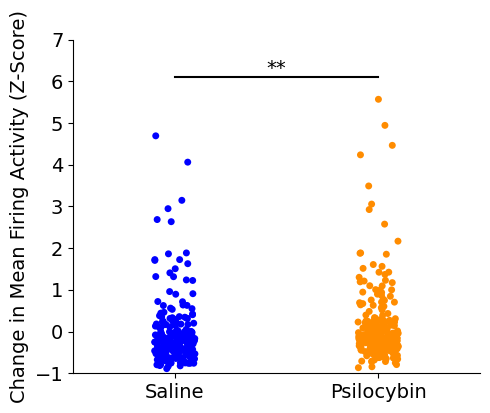

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

before = saline_mean_activity[:, 0]
after = saline_mean_activity[:, 1]

before_2 = psilo_mean_activity[:, 0]
after_2 = psilo_mean_activity[:, 1]

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

def calculate_relative_change(before, after):
    return [(a - b) / b for a, b in zip(after, before)]

# Remove outliers from the datasets
filtered_before = remove_outliers(before)
filtered_after = remove_outliers(after)
filtered_before_2 = remove_outliers(before_2)
filtered_after_2 = remove_outliers(after_2)

# Calculate the relative changes
relative_changes = calculate_relative_change(filtered_before, filtered_after)
relative_changes_2 = calculate_relative_change(filtered_before_2, filtered_after_2)

# Combine the data into a single list for plotting
relative_changes_combined = relative_changes + relative_changes_2

# Create a list of labels corresponding to each value
labels = ['Saline'] * len(relative_changes) + ['Psilocybin'] * len(relative_changes_2)

# Define custom colors for the points
palette = {'Saline': 'b', 'Psilocybin': '#FF8C00'}

# Create the strip plot
plt.figure(figsize=(5, 4))
plt.ylim(-1, 7)
sns.stripplot(x=labels, y=relative_changes_combined, jitter=True, palette=palette)
plt.axhline(xmin=0.25, xmax=0.75, y=6.1, color='black', linestyle='-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.5, 6.3, '**', horizontalalignment='center', verticalalignment='center',fontsize=14)

# Add titles and labels
plt.title('')
plt.ylabel('Change in Mean Firing Activity (Z-Score)', fontsize=14)
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(relative_changes, relative_changes_2)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Statistic: {statistic}")

Mann-Whitney U statistic: 22849.0
P-value: 0.0038196841974210034
Statistic: 22849.0


In [24]:
print(np.mean(relative_changes))
print(np.mean(relative_changes_2))

-0.01205641263706091
0.14007824748259462


In [51]:
def get_peak_amplitude_matched_cells(dict_pre,dict_post):

    amplitude_array_all = []

    for sub_dict_pre, sub_dict_post in zip(dict_pre.keys(),dict_post.keys()):

        coactive = get_consistently_responsive_cells(dict_pre,dict_post,sub_dict_pre,sub_dict_post)


        amplitude_array = np.zeros_like(coactive,dtype=float)

      

        for i, cell_1, cell_2 in zip(range(len(coactive)),coactive[:,0],coactive[:,1]):
            tuning_array_1 = dict_pre[sub_dict_pre][cell_1]['tuning']
            amplitude_1 = np.amax(tuning_array_1)
            amplitude_array[i,0] = amplitude_1
    
            tuning_array_2 = dict_post[sub_dict_post][cell_2]['tuning']
            amplitude_2 = np.amax(tuning_array_2)
            amplitude_array[i,1] = amplitude_2
           

        amplitude_array_all.append(amplitude_array)
    
    amplitude_array_all = np.concatenate(amplitude_array_all)

    return amplitude_array_all

In [52]:
saline_peak_amplitude = get_peak_amplitude_matched_cells(saline_pre,saline_post)

saline_peak_amplitude_diff = saline_peak_amplitude[:,1] - saline_peak_amplitude[:,0]

psilo_peak_amplitude = get_peak_amplitude_matched_cells(psilo_pre,psilo_post)

psilo_peak_amplitude_diff = psilo_peak_amplitude[:,1] - psilo_peak_amplitude[:,0]

C:\Users\Conor\AppData\Local\Temp\ipykernel_11880\4223393250.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=labels, y=relative_changes_combined, jitter=True, palette=palette)


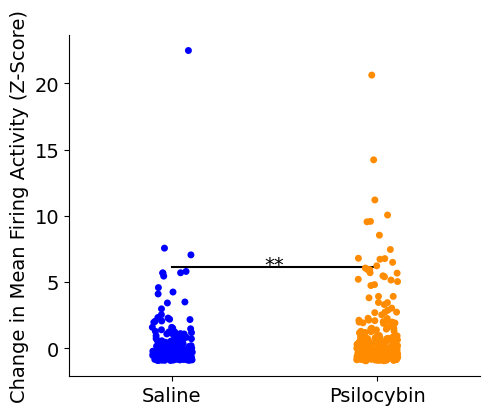

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

before = saline_peak_amplitude[:,0]
after = saline_peak_amplitude[:,1]

before_2 = psilo_peak_amplitude[:,0]
after_2 = psilo_peak_amplitude[:,1]

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]

def calculate_relative_change(before, after):
    return [(a - b) / b for a, b in zip(after, before)]

# Remove outliers from the datasets
filtered_before = remove_outliers(before)
filtered_after = remove_outliers(after)
filtered_before_2 = remove_outliers(before_2)
filtered_after_2 = remove_outliers(after_2)

# Calculate the relative changes
relative_changes = calculate_relative_change(filtered_before, filtered_after)
relative_changes_2 = calculate_relative_change(filtered_before_2, filtered_after_2)

# Combine the data into a single list for plotting
relative_changes_combined = relative_changes + relative_changes_2

# Create a list of labels corresponding to each value
labels = ['Saline'] * len(relative_changes) + ['Psilocybin'] * len(relative_changes_2)

# Define custom colors for the points
palette = {'Saline': 'b', 'Psilocybin': '#FF8C00'}

# Create the strip plot
plt.figure(figsize=(5, 4))
# plt.ylim(-1, 7)
sns.stripplot(x=labels, y=relative_changes_combined, jitter=True, palette=palette)
plt.axhline(xmin=0.25, xmax=0.75, y=6.1, color='black', linestyle='-')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.text(0.5, 6.3, '**', horizontalalignment='center', verticalalignment='center',fontsize=14)

# Add titles and labels
plt.title('')
plt.ylabel('Change in Mean Firing Activity (Z-Score)', fontsize=14)
# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

(-1.9473404900886504, 6.797241096400495)

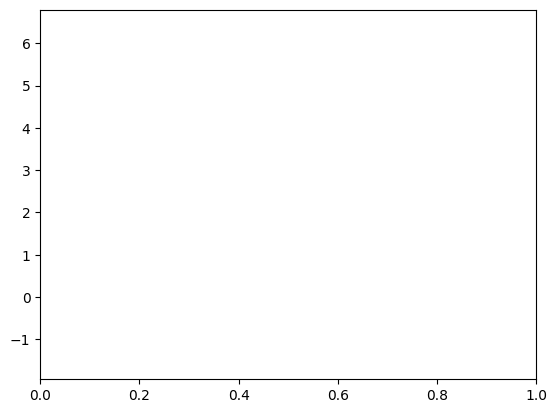

In [42]:
# Determine the min and max across both lists to set axis limits dynamically
all_data = relative_changes + relative_changes_2
min_val, max_val = min(all_data), max(all_data)

# Apply a margin around the min and max values for better visualization
plt.ylim(min_val - 1, max_val + 1)

C:\Users\Conor\AppData\Local\Temp\ipykernel_11880\942073357.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Group", y="Relative Change", data=data, inner=None, palette=palette)


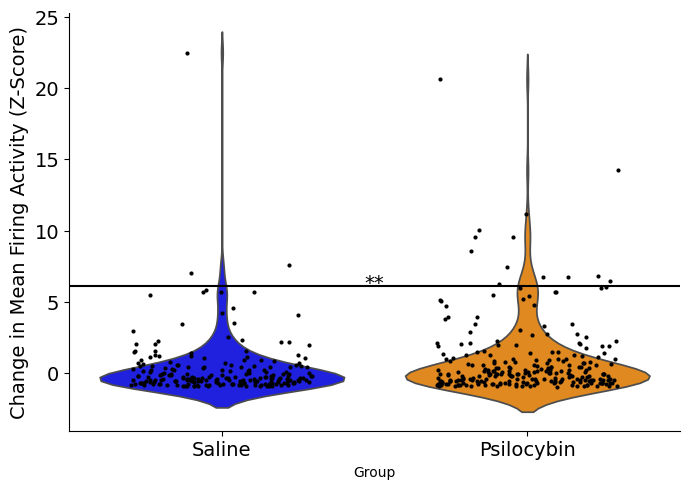

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine data into DataFrame
data = pd.DataFrame({
    'Relative Change': relative_changes_combined,
    'Group': labels
})

# Set up plot
plt.figure(figsize=(7, 5))

# Create a violin plot
sns.violinplot(x="Group", y="Relative Change", data=data, inner=None, palette=palette)

# Overlay with a strip plot
sns.stripplot(x="Group", y="Relative Change", data=data, color="k", size=3, jitter=0.3)

# Customize the plot
plt.axhline(y=6.1, color='black', linestyle='-')
plt.text(0.5, 6.3, '**', horizontalalignment='center', verticalalignment='center', fontsize=14)
plt.ylabel('Change in Mean Firing Activity (Z-Score)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [54]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(saline_peak_amplitude_diff, psilo_peak_amplitude_diff)

print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"Statistic: {statistic}")

Mann-Whitney U statistic: 30525.0
P-value: 0.132964594778108
Statistic: 30525.0


In [37]:
from statsmodels.stats.multitest import multipletests

p_values = [0.004, 0.133]

corrected_p_values = multipletests(p_values, method='fdr_bh')[1]

print(corrected_p_values)

[0.008 0.133]


In [38]:
def calculate_cdf(data):
    # Define your series
    s = pd.Series(data, name = 'value')
    df = pd.DataFrame(s)
    # Get the frequency, PDF and CDF for each value in the series

    # Frequency
    stats_df = df \
    .groupby('value') \
    ['value'] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {'value': 'frequency'})

    # PDF
    stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    # CDF
    stats_df['cdf'] = stats_df['pdf'].cumsum()
    stats_df = stats_df.reset_index()
    stats_df

    return stats_df

In [39]:
def plot_cdf(pre,post,title,label_1,label_2):
    pre_cdf = calculate_cdf(pre)
    post_cdf = calculate_cdf(post)

    label = [label_1,label_2]

    zipped = zip([pre_cdf,post_cdf], label)

    fig = plt.figure()

    for frame,label in zipped:
        plt.plot(frame['value'], frame['cdf'],label = label )
    plt.title(title,pad=10)
    # plt.xticks(range(4), [35,50,65,80],fontsize=12)
    plt.xlabel("Change in Overall Response Amplitude (z-score)",fontsize=18,labelpad=10)
    plt.ylabel("Cumulative Probability",fontsize=18,labelpad=10)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.grid(alpha=0.3)
    plt.legend(fontsize=18)
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.tight_layout()
    
    plt.show()

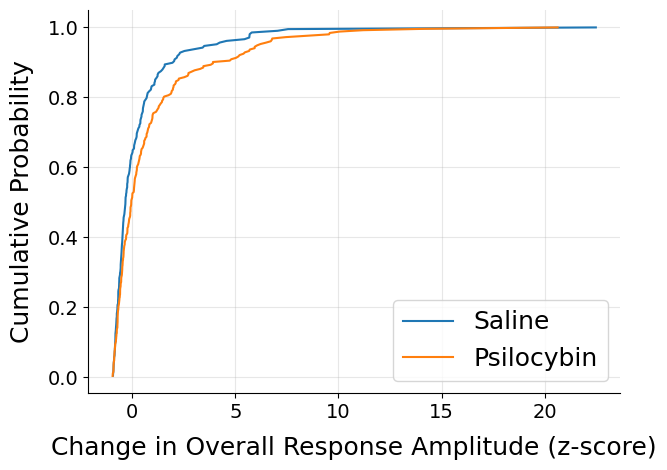

In [40]:
plot_cdf(relative_changes,relative_changes_2,'','Saline','Psilocybin')

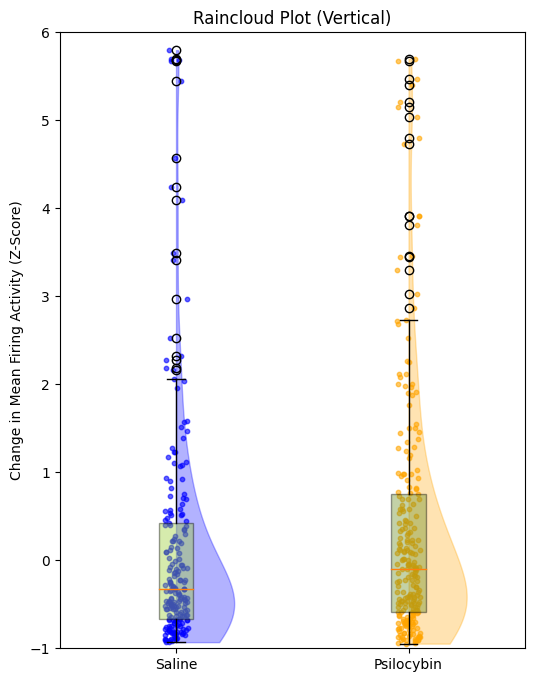

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Filter out any values > 6 in both relative_changes lists
relative_changes = [x for x in relative_changes if x <= 5.9]
relative_changes_2 = [x for x in relative_changes_2 if x <= 5.9]

# Example data structure, replace with your actual data
data_x = [relative_changes, relative_changes_2]  # List of lists/arrays

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 8))  # Adjusted to taller figure for vertical orientation

# Boxplot colors
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data (set vert=True for vertical orientation)
bp = ax.boxplot(data_x, patch_artist=True, vert=True)

# Apply colors and transparency to boxplot patches
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Violin plot colors
violin_colors = ['blue', 'orange']

# Violinplot data (set vert=True for vertical orientation)
vp = ax.violinplot(data_x, points=500, showmeans=False, showextrema=False, showmedians=False, vert=True)

# Modify violin plots for left half only, apply colors
for idx, b in enumerate(vp['bodies']):
    m = np.mean(b.get_paths()[0].vertices[:, 1])
    b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], idx + 1, idx + 2)
    b.set_color(violin_colors[idx])

# Scatter plot colors
scatter_colors = ['blue', 'orange']

# Scatterplot data with jitter
for idx, features in enumerate(data_x):
    x = np.full(len(features), idx + 1)  # Set x positions based on index for each dataset
    jittered_x = x + np.random.uniform(low=-0.05, high=0.05, size=len(features))  # Add jitter
    plt.scatter(jittered_x, features, s=10, color=scatter_colors[idx], alpha=0.6)

plt.ylim(-1,6)
# Label x-axis with feature/group names and set titles
plt.xticks(np.arange(1, len(data_x) + 1), ['Saline', 'Psilocybin'])  # Adjust labels as needed
plt.ylabel('Change in Mean Firing Activity (Z-Score)')
plt.title("Raincloud Plot (Vertical)")

# Display the plot
plt.show()